# Testbench for Scan Data Classes


In [10]:
#Loading in code and data
from kinetic import KineticScan
from spatialScan import SpatialScan
import matplotlib.pyplot as plt
from ss import SpatiallySeparated

kscanPath = "data/D5-R1-PDI-Nanocrystal-6-14-21-t0 k2_KIN.dat"
SOscanPath = "data/D5-R1-PDI-Nanocrystal-6-14-21-t0_NP.dat"
SSscanPath = 'data/D5-R1-PDI-Nanocrystal-6-14-21-t0_GV.dat'
betterKpath = 'data/D5-R2-PDI-Nanocrystal-6-14-21-t0 _KIN.dat'
image2Path = 'data/D1-PDI-Nanocrystal-r1_NP.dat'

# Automatically reload external modules
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1: Kinetic Scan
The KineticScan will be the first class tested. It inherits from the Data class. 

In [2]:
from kinetic import KineticScan
#Testing read method
k = KineticScan(kscanPath)
k.head()

array([[-9.99997530e+00,  1.62383550e-01,  2.55567000e-05],
       [-9.79798722e+00,  2.63713981e-01,  4.48558000e-05],
       [-9.59592278e+00,  1.60039190e-01,  2.51102000e-05],
       [-9.39393470e+00,  9.94964220e-02,  1.35794000e-05],
       [-9.19189572e+00,  5.89109043e-03, -4.24840000e-06]])

<AxesSubplot:xlabel='Time (ps)', ylabel='Delta R/R'>

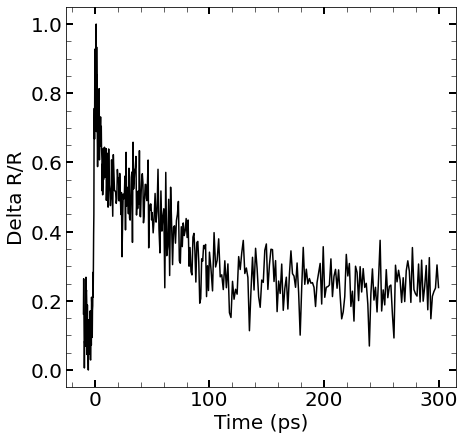

In [3]:
k.visualize()


### 2. Spatial Scans

Due to the similarity of the data representation of SO and SS scans, they are both handeled by one class. Children of this class may be needed down the line.


Dimentions of SO: 100 , 100


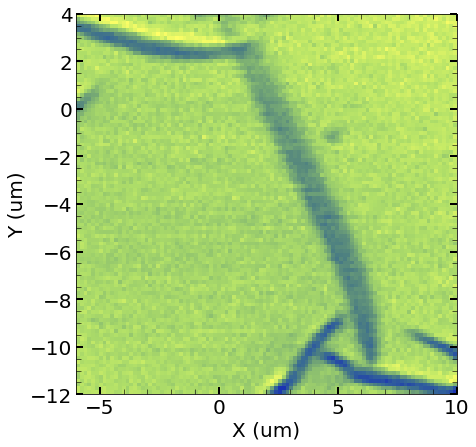

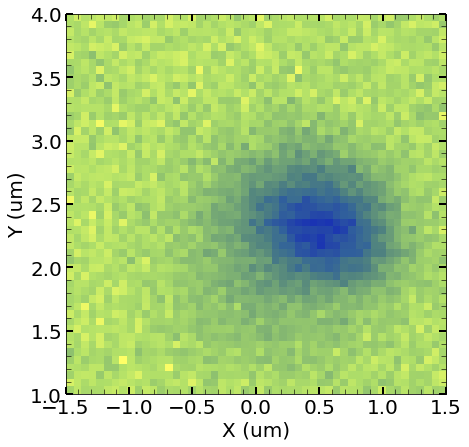

In [4]:
SO = SpatialScan(SOscanPath)
SS = SpatialScan(SSscanPath)
SO_dims = SO.findDimentions()
print(f'Dimentions of SO: {SO_dims[0]} , {SO_dims[1]}')
SO.visualize()
SS.visualize()
plt.show()

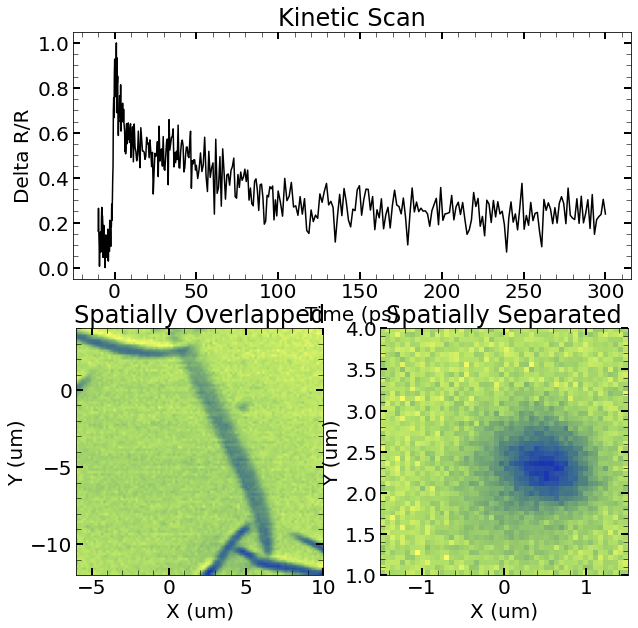

In [5]:
#Combining them into one plot
#fig = plt.Figure()
ax1 = plt.subplot2grid((2,2),(0,0),1,2)
ax2 = plt.subplot2grid((2,2),(1,0))
ax3 = plt.subplot2grid((2,2),(1,1))

fig = ax1.figure
k.visualize(ax1)
ax1.set_title('Kinetic Scan')
SO.visualize(ax2)
ax2.set_title('Spatially Overlapped')
SS.visualize(ax3)
ax3.set_title('Spatially Separated')


fig.set_size_inches(10,10)


### 3. Curve fitting for Kinetics
Testing the curve fittion using a double exponetiall with the scipy optimize.curve_fit() function

In [6]:
k = KineticScan(kscanPath)

p = k.fitCurve()
p

array([ 2.92139048e-01, -7.92196914e+02,  7.92576249e+02,  1.19378537e+02,
        1.19320793e+02])

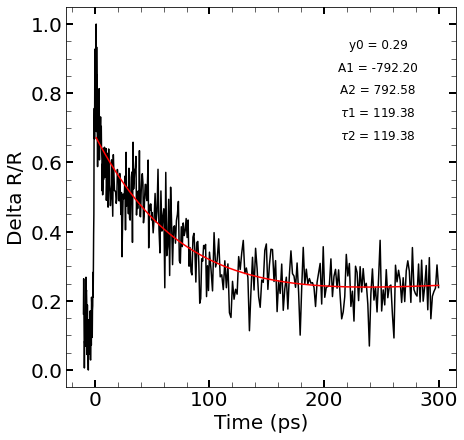

array([ 2.92139048e-01, -7.92196914e+02,  7.92576249e+02,  1.19378537e+02,
        1.19320793e+02])

In [7]:
ax = k.visualize()
k.plotFit(p, ax)

plt.show()

p

Doing the same thing, but with better data that will be easier to fit

y0 = 0.175805858776383, A1=0.3520809830391503, A2=0.4179919987240325, r1=3.505720424410648, r2=68.66182160722934


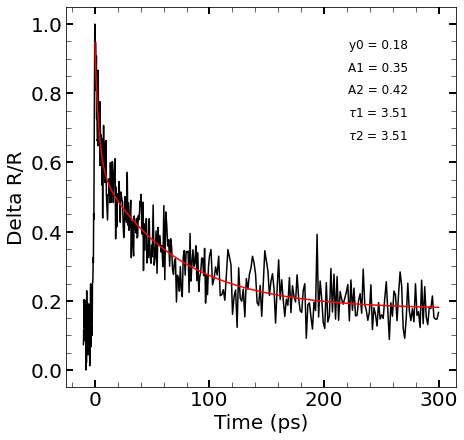

In [8]:
k = KineticScan(betterKpath)
p2 = k.fitCurve()
print(f'y0 = {p2[0]}, A1={p2[1]}, A2={p2[2]}, r1={p2[3]}, r2={p2[4]}')
ax = k.visualize()
k.plotFit(p2, ax)
#ax.plot([-20, 320], [0.37, 0.37])
plt.show()

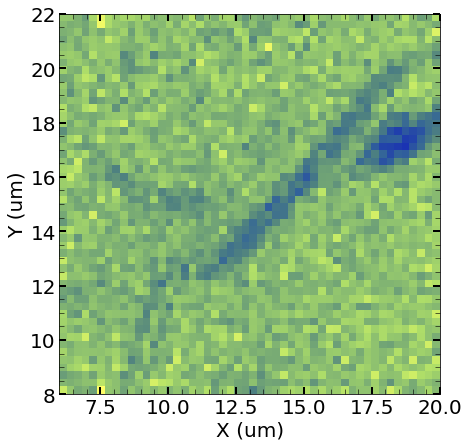

In [9]:
im = SpatialScan(image2Path)
im.visualize()
plt.show()

[[-1.50000000e+00  1.00000000e+00 -1.85665000e-05  6.05743975e-01]
 [-1.43877551e+00  1.00000000e+00  2.03470000e-06  5.93636447e-01]
 [-1.37755102e+00  1.00000000e+00 -1.61647000e-05  5.96773487e-01]
 [-1.31632653e+00  1.00000000e+00 -1.38971000e-05  6.13267610e-01]
 [-1.25510204e+00  1.00000000e+00 -1.29724000e-05  5.99180524e-01]]


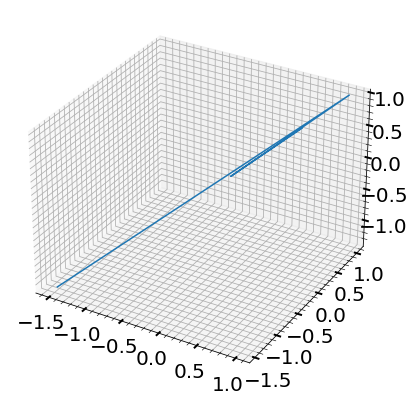

In [15]:
test3D = SpatiallySeparated(SSscanPath)
print(test3D.head())
test3D.vis3D()
plt.show()